In [1]:
# Nash Cascade Neural Network
# A hydrologically intuitive deep learning network

# Set up a solution to a network of buckets where the number of buckets in each layer
# flows out to the buckets in the next layer
# The parameter on each bucket is the size and height of each spigot.

# Need a function that solves this individually at a single buckets
# Then a function that loops through and moves the water to the downstream buckets

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ncnn import NashCascadeNeuralNetwork as ncnn

In [3]:

# Example
bucket_net = ncnn(cfg_file="./config.json")
bucket_net.initialize()


In [4]:
bucket_net.update_network()

In [5]:
bucket_net.summarize_network()

In [6]:
bucket_net.mean_H_per_layer

[99.7139682895556,
 99.81338344198063,
 99.88230813966699,
 100.46423127391137,
 100.07618171013858]

INITIAL network
mean H per layer
[99.7139682895556, 99.81338344198063, 99.88230813966699, 100.46423127391137, 100.07618171013858]
sum H per layer
[99.7139682895556, 199.62676688396127, 299.646924419001, 200.92846254782273, 100.07618171013858]
Total Mass in network: 900.0


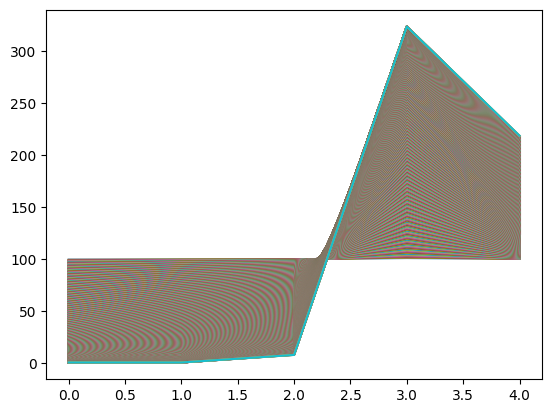

Final network
mean H per layer
[0.4791714931030408, 0.4559649758340343, 7.71426658065235, 323.6440094337412, 218.64110262511457]
sum H per layer
[0.4791714931030408, 0.9119299516680686, 23.14279974195705, 647.2880188674824, 218.64110262511457]
Total Mass in network: 890.5
Total Mass out of network 9.5
Total Mass in and out of network 900.0


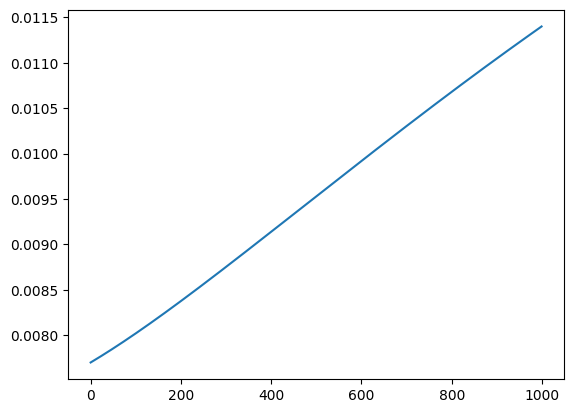

In [7]:
bucket_net.summarize_network()
print("INITIAL network")
print("mean H per layer")
print(bucket_net.mean_H_per_layer)
print("sum H per layer")
print(bucket_net.sum_H_per_layer)
print(f"Total Mass in network: {np.sum(bucket_net.sum_H_per_layer):.1f}")
network_outflow_list = []
for i in range(1000):
    network_outflow = bucket_net.update_network()
    network_outflow_list.append(bucket_net.network_outflow)
    bucket_net.summarize_network()
    plt.plot(bucket_net.mean_H_per_layer)
plt.show()
plt.close()
print("Final network")
print("mean H per layer")
print(bucket_net.mean_H_per_layer)
print("sum H per layer")
print(bucket_net.sum_H_per_layer)
print(f"Total Mass in network: {np.sum(bucket_net.sum_H_per_layer):.1f}")
print(f"Total Mass out of network {np.sum(network_outflow_list):.1f}")
print(f"Total Mass in and out of network {np.sum(bucket_net.sum_H_per_layer) + np.sum(network_outflow_list):.1f}")
plt.plot(network_outflow_list)
plt.show()
plt.close()